## How well do jobs and skills pay for Data Analysts in Spain?

Methodology

  1. Evaluate median salary for top 6 data jobs in Spain
  2. Find median salary per skill for Data Analysts
  3. Visualize for highest paying skills and most demanded skills

In [20]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [21]:
# Filter for the job titles and country

df_SPA = df[(df['job_country'] == 'Spain')].dropna(subset=['salary_year_avg'])


In [22]:
job_titles = df_SPA['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [23]:
df_SPA_top6 = df_SPA[df_SPA['job_title_short'].isin(job_titles)]

df_SPA_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
7170,Senior Data Engineer,Senior Software Engineer (Data Analytics),"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-07-24 13:27:58,False,False,Spain,year,89100.0,NaN,Aetion,"[java, python, scala, sql, r, flow]","{'other': ['flow'], 'programming': ['java', 'p..."
12335,Data Scientist,DESARROLLADOR PYTHON - PYSPARK,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-03-30 13:32:57,True,False,Spain,year,89100.0,NaN,Devoteam,"[python, sql, nosql, aws, azure, pyspark]","{'cloud': ['aws', 'azure'], 'libraries': ['pys..."
17710,Data Analyst,Master Data Analyst,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-02-03 13:44:52,True,False,Spain,year,51014.0,NaN,SGS,None,None
19856,Data Scientist,Data Scientist,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-07-03 13:18:20,False,False,Spain,year,90670.0,NaN,albelli-Photobox Group,"[python, r, sql, looker]","{'analyst_tools': ['looker'], 'programming': [..."
21264,Senior Data Engineer,Senior Data Engineer,Spain,via Ai-Jobs.net,Full-time,False,Spain,2023-03-06 14:05:42,False,False,Spain,year,147500.0,NaN,PayFit,"[python, sql, go, aws, redshift, snowflake, bi...","{'analyst_tools': ['looker'], 'cloud': ['aws',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772982,Machine Learning Engineer,Es- Machine Learning Con Spark,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-04-29 01:17:04,False,False,Spain,year,89100.0,NaN,Devoteam,"[python, scala, dynamodb, aws, databricks, spa...","{'cloud': ['aws', 'databricks'], 'databases': ..."
777078,Data Scientist,(Senior) Digital Analytics Engineer,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-04-25 05:17:30,False,False,Spain,year,147500.0,NaN,Netcentric,"[javascript, html, css, react, jquery, node.js...","{'libraries': ['react'], 'other': ['npm'], 'pr..."
781103,Data Analyst,Junior Data Analyst / After Sales,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-04-06 06:16:47,True,False,Spain,year,98500.0,NaN,Treatwell,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
781830,Data Engineer,Azure Data Architect,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-01-21 07:11:50,False,False,Spain,year,165000.0,NaN,SGS,"[sql, azure, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['azu..."


In [24]:
job_order = df_SPA_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

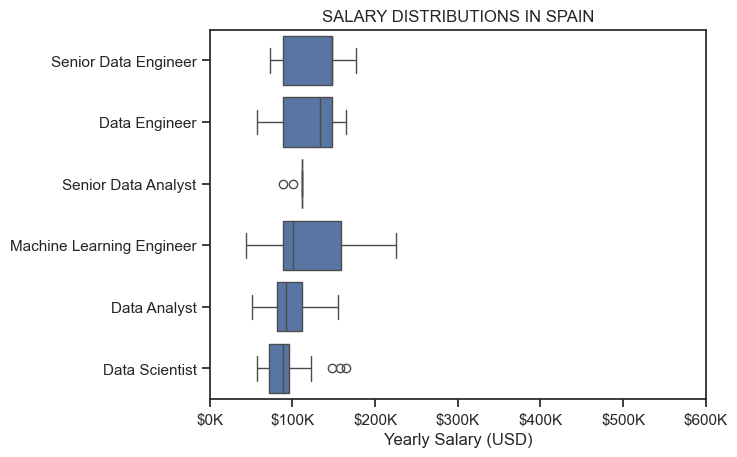

In [25]:
sns.boxplot(data=df_SPA_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('SALARY DISTRIBUTIONS IN SPAIN')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x =plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [26]:
df_DA_SPA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Spain')].copy()

df_DA_SPA = df_DA_SPA.dropna(subset=['salary_year_avg'])

df_DA_SPA


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
17710,Data Analyst,Master Data Analyst,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-02-03 13:44:52,True,False,Spain,year,51014.0,NaN,SGS,None,None
32177,Data Analyst,Data Analyst Coches.net,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-04-18 13:38:59,False,False,Spain,year,111175.0,NaN,Adevinta,"[sql, python, r, databricks, pandas, numpy, ma...","{'analyst_tools': ['word', 'tableau'], 'cloud'..."
48830,Data Analyst,Consultant (German Speaking) - Data Analytics,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-06-09 06:14:11,False,False,Spain,year,80850.0,NaN,Celonis,"[sql, python, r, matlab]","{'programming': ['sql', 'python', 'r', 'matlab']}"
84314,Data Analyst,Junior Data Analyst,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-07-21 00:51:17,False,False,Spain,year,57500.0,NaN,Amazon.com,"[vba, sql, redshift, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
88810,Data Analyst,Data Analyst,Spain,via Ai-Jobs.net,Full-time,False,Spain,2023-05-04 00:45:48,False,False,Spain,year,98500.0,NaN,Octopus Energy,"[python, pandas, jupyter, spreadsheet, tableau]","{'analyst_tools': ['spreadsheet', 'tableau'], ..."
98496,Data Analyst,Consultor AWS Data Analytics,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-03-26 00:27:42,True,False,Spain,year,80850.0,NaN,Devoteam,"[python, java, sql, aws, airflow, kafka, spark...","{'cloud': ['aws'], 'libraries': ['airflow', 'k..."
106101,Data Analyst,Data Analyst (Reporting and Insights),"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-05-14 00:38:10,False,False,Spain,year,111175.0,NaN,Netcentric,"[looker, power bi]","{'analyst_tools': ['looker', 'power bi']}"
140557,Data Analyst,Consultant - Process & Data Analytics,"Madrid, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-07-14 08:22:51,False,False,Spain,year,89100.0,NaN,Celonis,"[sql, python]","{'programming': ['sql', 'python']}"
219418,Data Analyst,Fleet Monitoring Analytics Engineer,Spain,via Ai-Jobs.net,Full-time,False,Spain,2023-12-27 22:12:13,False,False,Spain,year,155000.0,NaN,Capgemini,"[python, smartsheet]","{'async': ['smartsheet'], 'programming': ['pyt..."
245866,Data Analyst,Operations Data Analyst,"Barcelona, Spain",via Ai-Jobs.net,Full-time,False,Spain,2023-07-13 07:19:55,True,False,Spain,year,89100.0,NaN,Bitpanda,"[snowflake, tableau, git, gitlab]","{'analyst_tools': ['tableau'], 'cloud': ['snow..."


In [27]:
df_DA_SPA = df_DA_SPA.explode('job_skills')

df_DA_SPA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
17710,51014.0,None
32177,111175.0,sql
32177,111175.0,python
32177,111175.0,r
32177,111175.0,databricks


In [38]:
df_DA_top_pay = df_DA_SPA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
smartsheet,1,155000.0
sap,1,118640.0
npm,1,111202.0
node.js,1,111202.0
react,1,111202.0
angular,1,111202.0
scikit-learn,1,111175.0
looker,4,111175.0
numpy,2,111175.0


In [37]:
df_DA_top_skills = df_DA_SPA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_top_skills = df_DA_top_skills.head(10).sort_values(by='median', ascending=False)

df_DA_top_skills


,count,median
job_skills,,
looker,4,111175.0
pandas,4,108087.5
jupyter,3,105000.0
python,14,98500.0
tableau,9,98500.0
airflow,3,98500.0
sql,17,89100.0
snowflake,3,89100.0
power bi,4,73352.0


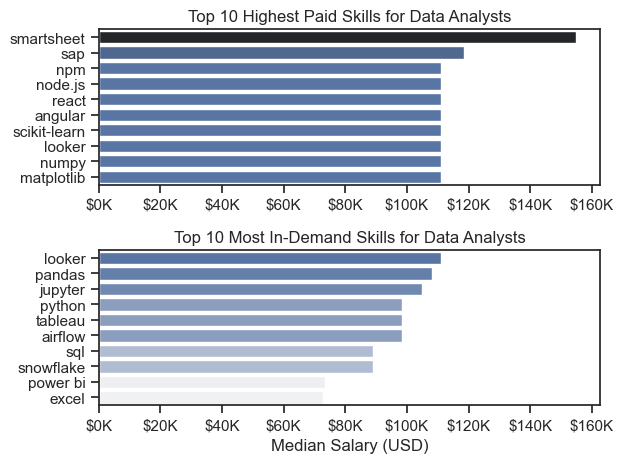

In [ ]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

# df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()